In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor

In [55]:
df = pd.read_csv("Hyd_House_Vill_Price.csv")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 10 columns):
Bedrooms            517 non-null int64
Bathrooms           517 non-null int64
Balconies           517 non-null int64
Pujaz_Rooms         517 non-null int64
Super_area          517 non-null int64
Carpet_area         517 non-null int64
Furnished_status    517 non-null object
Facing              517 non-null object
Address             517 non-null object
Price               517 non-null float64
dtypes: float64(1), int64(6), object(3)
memory usage: 40.5+ KB


In [57]:
house_furn_stat_dict = {}
Furn_Uniq = df['Furnished_status'].unique()
for j in range(len(Furn_Uniq)):
    House_Furn_stat_dict[Furn_Uniq[j]] = j

In [58]:
house_fac_dict = {}
Fac_Uniq = df['Facing'].unique()
for k in range(len(Fac_Uniq)):
    house_fac_dict[Fac_Uniq[k]] = k

In [59]:
house_addr_dict = {}
addr_Uniq = df['Address'].unique()
for l in range(len(addr_Uniq)):
    house_addr_dict[addr_Uniq[l]] = l

In [60]:
df['Furnished_status'] = df['Furnished_status'].map(house_furn_stat_dict)
df['Facing'] = df['Facing'].map(house_fac_dict)
df['Address'] = df['Address'].map(house_addr_dict)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 10 columns):
Bedrooms            517 non-null int64
Bathrooms           517 non-null int64
Balconies           517 non-null int64
Pujaz_Rooms         517 non-null int64
Super_area          517 non-null int64
Carpet_area         517 non-null int64
Furnished_status    517 non-null int64
Facing              517 non-null int64
Address             517 non-null int64
Price               517 non-null float64
dtypes: float64(1), int64(9)
memory usage: 40.5 KB


In [62]:
df.head()

,Bedrooms,Bathrooms,Balconies,Pujaz_Rooms,Super_area,Carpet_area,Furnished_status,Facing,Address,Price
0,3,3,0,1,990,850,0,0,0,55.0
1,3,2,0,0,873,810,0,1,1,65.0
2,3,2,0,0,828,774,1,2,2,65.0
3,3,2,0,1,900,800,1,3,3,35.0
4,3,3,0,0,900,800,0,2,4,35.0


In [63]:
df.corr()

,Bedrooms,Bathrooms,Balconies,Pujaz_Rooms,Super_area,Carpet_area,Furnished_status,Facing,Address,Price
Bedrooms,1.000000,0.467314,0.268741,0.093580,0.420161,0.320535,0.157263,-0.062045,-0.370872,0.147254
Bathrooms,0.467314,1.000000,0.369637,0.352515,0.503606,0.362574,0.205560,-0.117205,-0.358502,0.348298
Balconies,0.268741,0.369637,1.000000,0.128557,0.271345,0.226158,0.307178,-0.090152,-0.206992,0.013613
Pujaz_Rooms,0.093580,0.352515,0.128557,1.000000,0.351853,0.274709,0.027167,-0.148790,-0.233782,0.343232
Super_area,0.420161,0.503606,0.271345,0.351853,1.000000,0.690010,0.112810,-0.122027,-0.260054,0.369154
Carpet_area,0.320535,0.362574,0.226158,0.274709,0.690010,1.000000,0.044402,-0.067040,-0.246422,0.317665
Furnished_status,0.157263,0.205560,0.307178,0.027167,0.112810,0.044402,1.000000,-0.032381,-0.109653,0.060963
Facing,-0.062045,-0.117205,-0.090152,-0.148790,-0.122027,-0.067040,-0.032381,1.000000,0.060824,-0.071225
Address,-0.370872,-0.358502,-0.206992,-0.233782,-0.260054,-0.246422,-0.109653,0.060824,1.000000,-0.182522
Price,0.147254,0.348298,0.013613,0.343232,0.369154,0.317665,0.060963,-0.071225,-0.182522,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


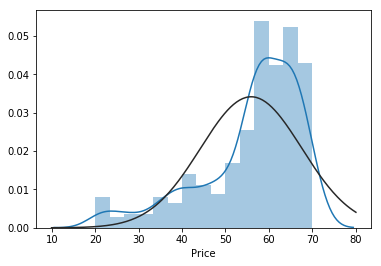

In [64]:
sns.distplot(df['Price'], fit=norm )

In [70]:
df['Price'] = np.log1p(df['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


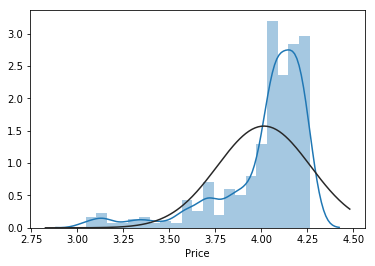

In [71]:
sns.distplot(df['Price'], fit=norm )

In [72]:
X = df.iloc[:,0:9]
y = df.iloc[:,-1]

In [73]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
           oob_score=False, random_state=3, verbose=0, warm_start=False)

In [74]:
clf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
           oob_score=False, random_state=3, verbose=0, warm_start=False)

In [75]:
y_pred = clf.predict(X)
from sklearn import metrics
print('r2 value                : ', metrics.r2_score(y, y_pred))

r2 value                :  0.8920550057132217


In [79]:
y_pred = clf.predict([[3,2,0,0,873,810,0,1,1]])

In [80]:
np.expm1(y_pred)

array([56.94550651])

In [81]:
import pickle
pickle.dump(clf, open('House_Vill_model.pkl','wb'))